In [1]:
import numpy as np
import os
from urllib.request import urlretrieve
import pandas as pd
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
def get_fremont_data(filename = 'Fremont.csv', url = URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL,'Fremont.csv')
    data = pd.read_csv('Fremont.csv',index_col='Date', parse_dates=True)
    data.columns = ('West', 'East')
    data['Total'] = data['East'] + data['West']
    return data



In [2]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


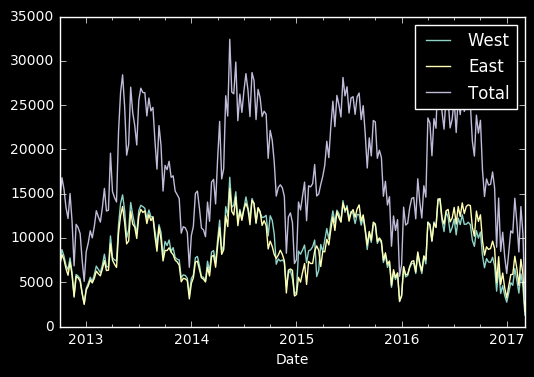

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
data.resample('W').sum().plot()

(0, 1100000.0)

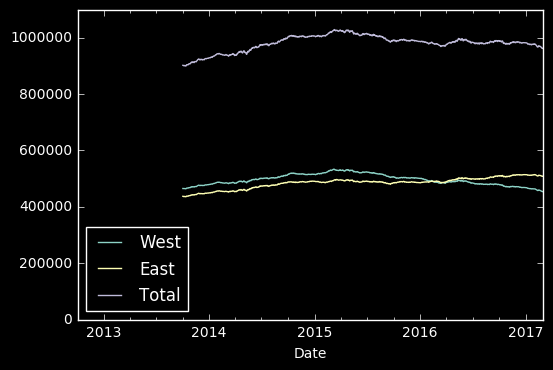

In [4]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

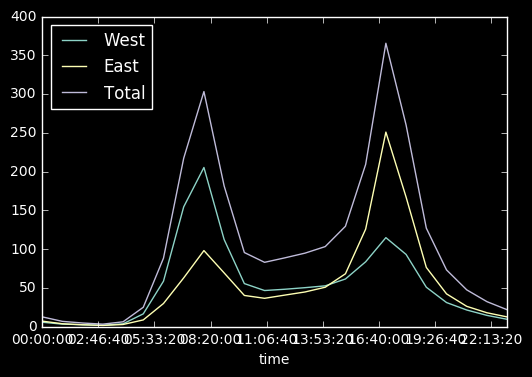

In [5]:
data.groupby(data.index.time).mean().plot() # Groupby the time for the last 4years

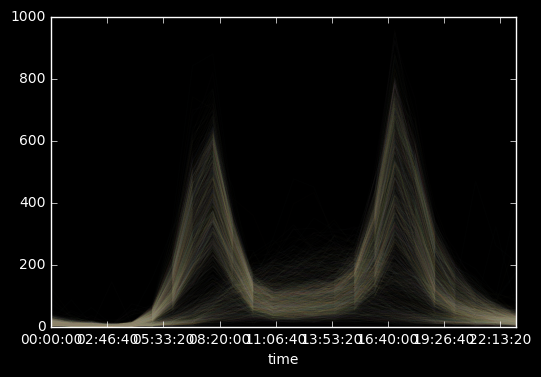

In [6]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]
pivoted.plot(legend = False,alpha=0.01);